# Tablas de frecuencia y Diagrama de Pareto

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import numpy as np
import random

from src import logic

In [164]:
plt.style.use('seaborn-dark')
_list = logic.List()
_, data = _list.get_lists("hola")

def rancolor():
    return "#" + ''.join(random.choice('0123456789AB') for j in range(6))
lista = []
for i in range(0, len(df)):
    lista.append(rancolor())

In [197]:
df = pd.DataFrame([data])
df = df.stack().reset_index()
df.columns = ['i', 'Palabras', 'Frec_abs']
df = df.drop(['i'], axis=1)
df = df.sort_values(by=['Frec_abs'], ascending=False)
df['Colors'] = lista

In [198]:
size = df['Frec_abs'].sum()
df["Frec_rel_%"]=100*df["Frec_abs"]/size

In [196]:
# Frecuencias absolutas
Frec_rel_val = df["Frec_rel_%"].values
acum = []
acum_val = 0

for val in Frec_rel_val:
    acum_val = acum_val + val
    acum.append(acum_val)

df["Frec_rel_%_acum"] = acum
df["Longitud_palabra"] = df["Palabras"].str.len()
df

,Palabras,Frec_abs,Colors,Frec_rel_%,Frec_rel_%_acum,Longitud_palabra
1,gracias,2,#831214,50.0,50.0,7
0,agricultores,1,#165676,25.0,75.0,12
2,lima,1,#B56581,25.0,100.0,4


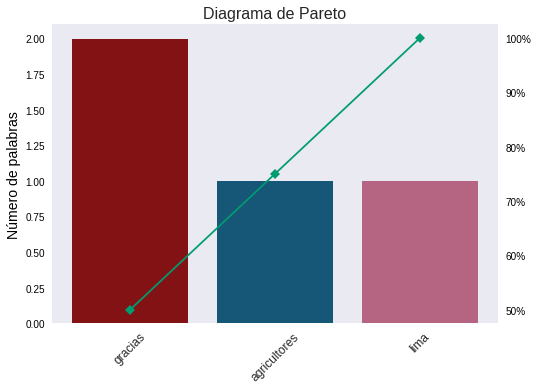

In [217]:
fig, ax = plt.subplots()
ax.set_title('Diagrama de Pareto', size=16)

ax.bar(df["Palabras"], df["Frec_abs"], color=df["Colors"])
ax.set_ylabel("Número de palabras", color="Black", size=14)
ax.tick_params(axis="y", colors="Black")

tick_labels = tuple(df["Palabras"])
x_max = int(max(plt.xticks()[0]))
plt.xticks(range(0, x_max+1), tick_labels, rotation=45, size=12)

ax2 = ax.twinx()
ax2.plot(df["Palabras"], df["Frec_rel_%_acum"], color=rancolor(), marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.tick_params(axis="y", colors="Black")

plt.savefig('img/pareto.png')

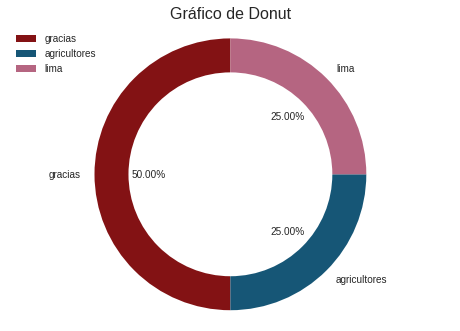

In [222]:
plt.title('Gráfico de Donut', size=16)
plt.pie(x=df['Frec_abs'], labels=df['Palabras'], autopct='%.2f%%',
        startangle=90, colors=df['Colors'])
plt.axis('equal')
plt.legend(loc='upper left')
donut = plt.Circle(xy=(0,0), radius=.75, facecolor='white')
plt.gca().add_artist(donut)
plt.savefig('img/donut.png')

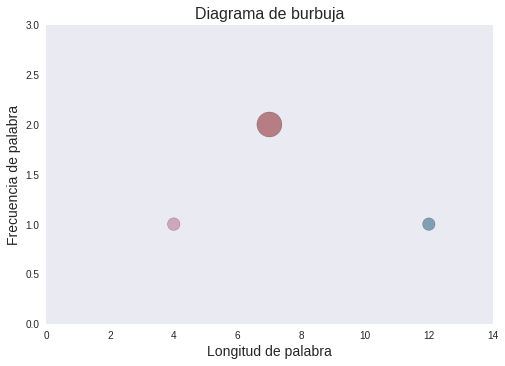

In [224]:
df['Area'] = (25 * df['Frec_abs']/2)**2
plt.scatter(df['Longitud_palabra'], df['Frec_abs'], s=df['Area'], c=df['Colors'],
            label=str(category), edgecolors='black', alpha=0.5)
plt.xlim([0, df['Longitud_palabra'].max() + 2])
plt.ylim([0, df['Frec_abs'].max() + 1])
plt.xlabel("Longitud de palabra", size=14)
plt.ylabel("Frecuencia de palabra", size=14)
plt.title("Diagrama de burbuja", size=16)
plt.savefig('img/burbuja.png')